In [14]:
import serial

serialPort = serial.Serial(port = "COM7", baudrate=921600,
                           bytesize=8, timeout=2, stopbits=serial.STOPBITS_ONE)

In [1]:
#Loading MNIST dataset
from tensorflow.keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
X_train=train_X.reshape(-1,784)
X_test=test_X.reshape(-1,784)

#### OPE from Boldyreva's paper  https://github.com/tonyo/pyope, Encryption done in EC2 instance. 

In [10]:
OPE_ciphers = {-2: 9913043, 0: 10051064, 1: 10110880, 2: 10178451, 3: 10239092, 4: 10256163, 5: 10311743, 6: 10428057, 7: 10459335, 8: 10495495, 9: 10621710, 10: 10645813, 11: 10700220, 12: 10708006, 13: 10738547, 14: 10810050, 15: 10847584, 16: 10957410, 17: 10964188, 18: 11365368, 19: 11588596, 20: 11667110, 21: 11763668, 22: 11885383, 23: 12053585, 24: 12113758, 25: 12161483, 26: 12207861, 27: 12220718, 28: 12228678, 29: 12411484, 30: 12880615, 31: 12908743, 32: 12953385, 33: 13090980, 34: 13115331, 35: 13178136, 36: 13229076, 37: 13242460, 38: 13330733, 39: 13419802, 40: 13445220, 41: 13490312, 42: 13636489, 43: 13677650, 44: 13759948, 45: 13869191, 46: 13873290, 47: 13978160, 48: 13999815, 49: 14003727, 50: 14206181, 51: 14300211, 52: 14348370, 53: 14447938, 54: 14490267, 55: 14532391, 56: 14579174, 57: 14608709, 58: 14629144, 59: 14836263, 60: 14869055, 61: 14987140, 62: 15004161, 63: 15060946, 64: 15097465, 65: 15117359, 66: 15230501, 67: 15315763, 68: 15362959, 69: 15444120, 70: 15715255, 71: 15783505, 72: 15923727, 73: 16220423, 74: 16449773, 75: 16516335, 76: 16617270, 77: 16630217, 78: 16822442, 79: 16884121, 80: 17049015, 81: 17124478, 82: 17177288, 83: 17268477, 84: 17556604, 85: 17697882, 86: 17989391, 87: 17997012, 88: 18026941, 89: 18084151, 90: 18134712, 91: 18164559, 92: 18170021, 93: 18425234, 94: 18474629, 95: 18694294, 96: 18753691, 97: 18770967, 98: 18842916, 99: 18885576, 100: 18941096, 101: 18989692, 102: 19090878, 103: 19189268, 104: 19195352, 105: 19299643, 106: 19375230, 107: 19520442, 108: 19566562, 109: 19646520, 110: 19741924, 111: 19876868, 112: 20017480, 113: 20186726, 114: 20353394, 115: 20417394, 116: 20423880, 117: 20601169, 118: 20616151, 119: 20701944, 120: 20760777, 121: 20922159, 122: 20935212, 123: 20949093, 124: 21154015, 125: 21552822, 126: 21624175, 127: 21766390, 128: 21803174, 129: 21872065, 130: 21888611, 131: 21995049, 132: 22030451, 133: 22076871, 134: 22106706, 135: 22182362, 136: 22233998, 137: 22328802, 138: 22470632, 139: 22675573, 140: 22706844, 141: 22804188, 142: 22905731, 143: 23179616, 144: 23285041, 145: 23325386, 146: 23385643, 147: 23523728, 148: 23540087, 149: 23549793, 150: 23600049, 151: 23633797, 152: 23680677, 153: 23688318, 154: 23748647, 155: 23815899, 156: 23934509, 157: 24069123, 158: 24232237, 159: 24337832, 160: 24504358, 161: 24528725, 162: 24644451, 163: 24795033, 164: 24821599, 165: 24892030, 166: 24976881, 167: 25008933, 168: 25115710, 169: 25248773, 170: 25334079, 171: 25446567, 172: 25525499, 173: 25576794, 174: 25783554, 175: 25951792, 176: 26200278, 177: 26223148, 178: 26388402, 179: 26492103, 180: 26569119, 181: 26583230, 182: 26788597, 183: 26813641, 184: 27046868, 185: 27300507, 186: 27359496, 187: 27469521, 188: 27511823, 189: 27649726, 190: 27779031, 191: 27856488, 192: 27914552, 193: 28297357, 194: 28393765, 195: 28420691, 196: 28507066, 197: 28556627, 198: 28630342, 199: 28638909, 200: 28738167, 201: 28784011, 202: 29011573, 203: 29261974, 204: 29305152, 205: 29431268, 206: 29536505, 207: 29779720, 208: 29836311, 209: 29913437, 210: 29937843, 211: 30064936, 212: 30149096, 213: 30296791, 214: 30389757, 215: 30401307, 216: 30413833, 217: 30466770, 218: 30562752, 219: 30660245, 220: 30765812, 221: 30871825, 222: 30947139, 223: 31314262, 224: 31615197, 225: 31666910, 226: 31786626, 227: 31831851, 228: 31837200, 229: 31864861, 230: 32016039, 231: 32340647, 232: 32431008, 233: 32476996, 234: 32559869, 235: 32583906, 236: 32645203, 237: 32742412, 238: 32765761, 239: 32797269, 240: 32866907, 241: 33005106, 242: 33095294, 243: 33107600, 244: 33231184, 245: 33316975, 246: 33415852, 247: 33475824, 248: 33648479, 249: 33703614, 250: 33723953, 251: 33875088, 252: 33996506, 253: 34084541, 254: 34220365, 255: 34282105}

In [11]:
import numpy as np
X_train_enc = np.zeros(X_train.shape,  dtype=int)
X_test_enc = np.zeros(X_test.shape,  dtype=int)

#Encrypting dataset of training 
print('Encryption for train data.')
for i in range(X_train.shape[0]):  
    for j in range(X_train.shape[1]):
        msg = X_train[i,j]
        encrypted_val = OPE_ciphers[msg]
        X_train_enc[i,j] = encrypted_val
        
#Encrypting dataset for inference
print('Encryption for test data.')
for i in range(X_test.shape[0]):
    for j in range(X_test.shape[1]):
        msg = X_test[i,j]
        encrypted_val = OPE_ciphers[msg]
        X_test_enc[i,j] = encrypted_val

Encryption for train data.
Encryption for test data.


In [12]:
#Byte generation function
import pdb
max_val_train = np.max(X_train_enc)
max_val_test = np.max(X_test_enc)
max_val_overall = np.max([max_val_train, max_val_test])
req_byte_length = int((int(max_val_overall).bit_length() / 8) +1)
print('maximum value of a MNIST image pixel is {}'.format(255))
print('Number of bytes required to send encrypted data is {}.'.format(req_byte_length))

def to_enc_byte(val, req_byte_length):
    byte_converted = []
    enc_num_split_8bit = []
    if val.bit_length() < req_byte_length * 8:  #testing if zero filling is required at left most bit positions
        size_fill_zeros = req_byte_length * 8 - val.bit_length()
        bin_val = '0b' + str(size_fill_zeros * '0') + bin(val)[2:]    #appending zeros to left side to make equal size 8 bit word
    
    for i in range(req_byte_length):
        try:
            byte_converted.append(bytes([int(bin_val[-8:], 2)])) #extracting rightmost 8 bit
            enc_num_split_8bit.append(int(bin_val[-8:], 2))
        except:
            byte_converted.append(bytes([int('0' + bin_val[-8:], 2)])) #extracting rightmost 8 bit
            enc_num_split_8bit.append(int('0' + bin_val[-8:], 2))
        bin_val = int(bin_val, 2) >> 8  #shifting by 8 bit to extact another byte in next for-loop cycle
        bin_val = bin(bin_val)
            
    return(byte_converted[::-1], enc_num_split_8bit[::-1])   #return in reverse order of appending into list so that MSB 8 bit is equivalent to zeroth byte
byte_encryptded = to_enc_byte(int(OPE_ciphers[255]),req_byte_length)
print('Testing the byte generation function for the sample pixel value 255 {}'.format(byte_encryptded))

maximum value of a MNIST image pixel is 255
Number of bytes required to send encrypted data is 4.
Testing the byte generation function for the sample pixel value 255 ([b'\x02', b'\x0b', b'\x1a', b'y'], [2, 11, 26, 121])


In [13]:
#Converting the pixel value to bytes.
print('Converting the integer pixel value to byte format for training set of 5000 samples.')
Byte_X_train=[]
for i in range(5000):
    byte_X_train=[]
    for j in range(X_train_enc.shape[1]):
        byte_X_train.append(to_enc_byte(int(X_train_enc[i][j]), req_byte_length)[0])
    Byte_X_train.append(byte_X_train)

EncSplit8bit_X_train=[]
for i in range(X_train_enc.shape[0]):
    encsplit8bit_X_train=[]
    for j in range(X_train_enc.shape[1]):
        encsplit8bit_X_train.append(to_enc_byte(int(X_train_enc[i][j]), req_byte_length)[1])
    EncSplit8bit_X_train.append(encsplit8bit_X_train)
    
print('Converting the integer pixel value to byte format for validation set of 5000 samples.')
Byte_X_test=[]
for i in range(5000):
    byte_X_test=[]
    for j in range(X_test_enc.shape[1]):
        byte_X_test.append(to_enc_byte(int(X_test_enc[i][j]), req_byte_length)[0])
    Byte_X_test.append(byte_X_test)
    
EncSplit8bit_X_test=[]
for i in range(X_test_enc.shape[0]):
    encsplit8bit_X_test=[]
    for j in range(X_test_enc.shape[1]):
        encsplit8bit_X_test.append(to_enc_byte(int(X_test_enc[i][j]), req_byte_length)[1])
    EncSplit8bit_X_test.append(byte_X_test)

Converting the integer pixel value to byte format for training set of 5000 samples.
Converting the integer pixel value to byte format for validation set of 5000 samples.


********************Expected label is 4 *******************



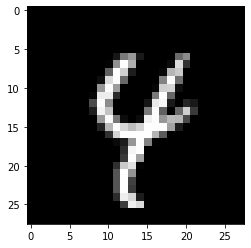

Byte stream created. Sending now: [[0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 248], [0, 153, 93, 24

-----------Received data from FPGA.-----------
[0, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 248, 0, 153, 93, 24

N
Thank you for using decision tree inference in FPGA.


In [20]:
import time
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
while(1):
    serialPort.reset_input_buffer()
    serialPort.reset_output_buffer()
    sending_sample = np.random.randint(0,5000)  #picking any sample example from the trainset. Remember that trainset is limited to 10000 samples due to space and runtime constraints.
    fig = plt.figure
    print('********************Expected label is {} *******************\n'.format(train_y[sending_sample]))
    plt.imshow(train_X[sending_sample], cmap='gray')
    plt.show()

    print('Byte stream created. Sending now: {}'.format(EncSplit8bit_X_train[sending_sample]))
    print('Sent bytes of length {} x {} = {}.'.format(X_train_enc.shape[1], req_byte_length, len(Byte_X_train[sending_sample]) * req_byte_length))
    serialString = ""                           # Used to hold data coming over UART
    for val in Byte_X_train[sending_sample]:
        for byte_index in range(req_byte_length):
            sent_val = serialPort.write(val[byte_index])    #sending the MSB byte first following by LSB byte in the end.
    #print('Number of bytes sent is: {}. '.format(sent_val))
    count_received_data = 0
    while(1):
        # Wait until there is data waiting in the serial buffer
        if(serialPort.in_waiting > 0):
            # Read data out of the buffer until a carraige return / new line is found
            #serialString = serialPort.readline()
            #received_data=list(serialString)
            #print('-----------Received data from FPGA.-----------')
            #print(received_data)
            #print('Length of received data {}'.format(len(received_data)-1))
            #print('Last {} bytes received are  for encrypted label.'.format(req_byte_length))
            #print ('Encrypted label words are {}'.format(received_data[-req_byte_length:]))
            serialString = serialPort.readlines()
            print('-----------Received data from FPGA.-----------')
            for string in serialString:
                received_data=list(string)
                print(received_data)
                count_received_data = count_received_data + len(received_data) 
            print('Length of received data {}'.format(count_received_data-1))
            print('Last {} bytes received are  for encrypted label.'.format(req_byte_length))
            print ('Encrypted label words are {}'.format(received_data[-req_byte_length:]))
            
            received_encrypted_label = [format(byte, '#0' + str(10)+ 'b') for byte in received_data[-req_byte_length:]]
            received_encrypted_label = [s.replace('0b','') for s in received_encrypted_label]
            received_encrypted_label = ''.join(received_encrypted_label)
            print('Encrypted label received is {}'.format(int('0b'+received_encrypted_label,2)))
            received_cipher = int(received_encrypted_label, 2)
            for plain_text, cipher in OPE_ciphers.items():  
                if received_cipher == cipher:
                    print('Decrypted label received is {}'.format(plain_text))
            sent_words = [item for sublist in EncSplit8bit_X_train[sending_sample] for item in sublist]
            received_words = received_data[:-req_byte_length]
            #Sanity check that sent and received pixels values are same.
            #print('Doing sanity check of received and sent bytes match')
            #for k,(i,j) in enumerate(zip(sent_words, received_words)):
            #    if i!=j:
            #        print('Incorrect at byte {}. Sent {}, received {}.'.format(k,i,j))
            
            break
    print('Do you want to continue: press Y for yes and N for no.')
    continue_command = input()
    if continue_command == 'Y' or continue_command =='y':
        clear_output(wait=True)
    else:
        print('Thank you for using decision tree inference in FPGA.')
        break

# END



<br>

<br>

<br>

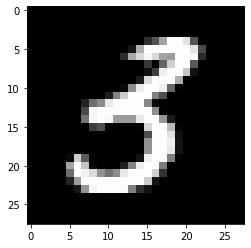

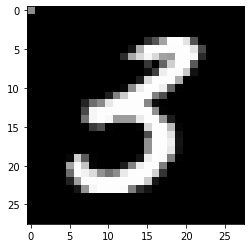

In [125]:
#Sanity check. Decrypting the pixel from sent and received encrypted pixels and generating image from it.
sent_encrypted_words = [format(byte, '#0' + str(10)+ 'b') for byte in sent_words]
sent_encrypted_words = [s.replace('0b','') for s in sent_encrypted_words]
sent_encrypted_pixel = [''.join([sent_encrypted_words[3*i], sent_encrypted_words[3*i+1], sent_encrypted_words[3*i+2]]) for i in range(784) ]
sent_encrypted_pixel =  [int('0b'+i,2) for i in sent_encrypted_pixel]
sent_pixel = [decrypt(i,p) for i in sent_encrypted_pixel]
plt.imshow(np.array(sent_pixel).reshape(28,28), cmap='gray')
plt.show()

received_encrypted_words = [format(byte, '#0' + str(10)+ 'b') for byte in received_words]
received_encrypted_words = [s.replace('0b','') for s in received_encrypted_words]
received_encrypted_pixel = [''.join([received_encrypted_words[3*i], received_encrypted_words[3*i+1], received_encrypted_words[3*i+2]]) for i in range(784) ]
received_encrypted_pixel =  [int('0b'+i,2) for i in received_encrypted_pixel]
received_pixel = [decrypt(i,p) for i in received_encrypted_pixel]
plt.imshow(np.array(received_pixel).reshape(28,28), cmap='gray')
plt.show()